Напишите функции:

- our_root(f, x0, step, tol), 
- our_max(f, x0, step, tol),
- our_min(f, x0, step, tol)

осуществляющие численный поиск корня, максимума и минимума функции одной переменной f(x) в окрестности точки x0 с точностью (по x) tol и начальным шагом step. Примените её к следующей функции, а также сравните с результатом символьного вычисления (через решение уравнения равенства нулю функции, её производной, проверки знака второй производной…)
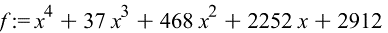

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [231]:
def our_root(f, x0, step, tol):
  curx = x0
  l = curx
  a = f.subs(x, curx)
  curx += step
  r = curx
  a_next = f.subs(x, curx)
  if a > 0:
    if a_next > a:
      step = step * -1

    while(a_next > 0):
      a = a_next
      curx += step
      a_next = f.subs(x, curx)
      l = r
      r = curx

  if a < 0:
    if a_next < a:
      step = step * -1

    while(a_next < 0):
      a = a_next
      curx += step
      a_next = f.subs(x, curx)
      l = r
      r = curx

  if (l > r):
    l, r = r, l

  return D(f, l, r, tol)

def D(f, l, r, tol):
  while r - l > tol:
    m = (l + r) / 2
    fl = f.subs(x, l)
    fr = f.subs(x, r)
    fm = f.subs(x, m)   
    if fm > 0:
      if fl > fr:
        l = m
      else:
        r = m
    else:
      if fl > fr:
        r = m
      else:
        l = m

  print('__root info__')
  print('l: ', l,'r: ', r)
  print('dif: ' + str(r - l))
  return((r + l) / 2) 

In [232]:
def our_min(f, x0, step, tol):
  curx = x0
  l = x0 - step
  r = x0 + step
  if l > r:
    l, r = r, l
  while(r - l > tol):
    a_l = f.subs(x, curx - step)
    a_m = f.subs(x, curx)
    a_r = f.subs(x, curx + step)
    l, m, r = curx - step, curx, curx + step
    if a_m > a_r:
      curx += step
      while(a_m > a_r):
        a_l = a_m
        l = m
        a_m = a_r
        m = r
        curx += step
        r = curx
        a_r = f.subs(x, curx)
    else:
      curx -= step
      while(a_m < a_r):
        a_r = a_m
        r = m
        a_m = a_l
        m = l
        curx -= step
        l = curx
        a_l = f.subs(x, curx) 

    if l > r:
      l, r = r, l
    step *= -1
    step /= 2 

  print('__min info__')
  print('l: ', l,'r: ', r) 
  print('dif: ' + str(r - l))
  return((r + l) / 2) 
  
  
  

In [233]:
def our_max(f, x0, step, tol):
  curx = x0
  l = x0 - step
  r = x0 + step
  if l > r:
    l, r = r, l
  while(r - l > tol):
    a_l = f.subs(x, curx - step)
    a_m = f.subs(x, curx)
    a_r = f.subs(x, curx + step)
    l, m, r = curx - step, curx, curx + step
    if a_m < a_r:
      curx += step
      while(a_m < a_r):
        a_l = a_m
        l = m
        a_m = a_r
        m = r
        curx += step
        r = curx
        a_r = f.subs(x, curx)
    else:
      curx -= step
      while(a_m > a_r):
        a_r = a_m
        r = m
        a_m = a_l
        m = l
        curx -= step
        l = curx
        a_l = f.subs(x, curx) 

    if l > r:
      l, r = r, l
    step *= -1
    step /= 2 

  print('__max info__')
  print('l: ', l,'r: ', r) 
  print('dif: ' + str(r - l))
  return((r + l) / 2) 

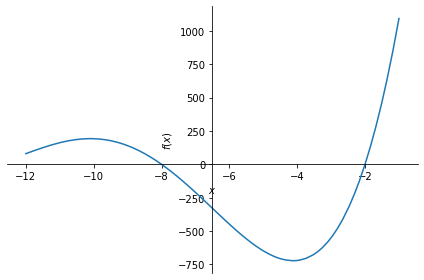

x0: -6
step: 0.1
tol: 0.001
__root info__
l:  -8.000781249999992 r:  -7.999999999999993
dif: 0.0007812499999992895
__min info__
l:  -4.120703125000007 r:  -4.119921875000007
dif: 0.0007812499999992895
__max info__
l:  -10.096874999999986 r:  -10.096093749999987
dif: 0.0007812499999992895

real roots: [-14, -13, -8, -2]
our root: -8.000390624999993
real critical points: sympy выводит почему-то выводит бяку с комплексными числами, хотя очевидно есть рациональные корни. Наши значения совпали с реальными
our min: -4.120312500000007 our max: -10.096484374999987


In [241]:
x = sp.symbols('x')
f = x**4 + 37*x**3 + 468*x**2 + 2252*x + 2912
sp.plot(f, (x, -12, -1))

x0 = float(input('x0: '))
step = float(input('step: '))
tol = float(input('tol: '))

root = our_root(f, x0, step, tol)
mn = our_min(f, x0, step, tol)
mx = our_max(f, x0, step, tol)
print()

print('real roots:', sp.solve(f))
print('our root:', root)
print('real critical points:', 'sympy выводит почему-то выводит бяку с комплексными числами, хотя очевидно есть рациональные корни. Наши значения совпали с реальными')
print('our min:', mn, 'our max:', mx)